00 estimator_type ======================================
classifier

01 variable, method 및 key 확인 ========================
['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

02 Data 구성 및 첫번째 data 확인 =======================
(1797, 64)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

03 Data의 future 이름 확인==============================
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixe

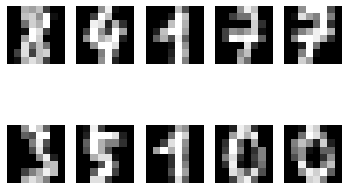


06 Data의 target name 확인==============================
[0 1 2 3 4 5 6 7 8 9]

07 Data의 description 확인==============================
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different

In [2]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Model에 따라 이부분 변경======================================
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier
print('00 estimator_type ======================================')
print(random_forest._estimator_type)
print()

# (2) 데이터 준비
digits = load_digits()
print('01 variable, method 및 key 확인 ========================')
print(dir(digits))
print(digits.keys())
print()

# (3) 데이터 이해하기
digits_data = digits.data
print('02 Data 구성 및 첫번째 data 확인 =======================')
print(digits_data.shape)
print(digits_data[0])
print()

print('03 Data의 future 이름 확인==============================')
print(digits.feature_names)
print()

digits_label = digits.target
print('04 Data의 label 확인 ===================================')
print(digits_label.shape)
print(digits_label[:50])
print()

print('05 data의 image 확인 (41번째부터 10개만) ===============')
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    plt.subplot(2, 5, i+1)  # 2 raw, 5 column
    plt.imshow(digits.data[i+40].reshape(8, 8), cmap='gray')  # 41번째부터
    plt.axis('off')
plt.show()
print()

print('06 Data의 target name 확인==============================')
print(digits.target_names)
print()

print('07 Data의 description 확인==============================')
print(digits.DESCR)
print()


# (4) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=21)  # 숫자변경====
print('08 train data 및 test data 정보 확인 ===================')
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
print([X_train.shape, y_train.shape])
print([X_test.shape, y_test.shape])
print(y_train)
print(y_test)
print()


# (5) 모델 학습 및 학습결과 확인 
# Model에 따라 이부분 변경======================================
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print('09 test 결과 확인 ======================================')
print(y_pred)
print()

# (6) 성능 평가
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print('10 학습결과 accuracy 및 confusion matrix 확인 ==========')
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))  # 정답, 오답 갯수 확인, 성능지표값은 별도 계산필요
print()

print('11 학습결과 보고서 =====================================')
print(classification_report(y_test, y_pred))